## Importations

In [1]:
# Run Keras on CPU (or GPU)
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"    
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"         # -1 if CPU

In [2]:
# Importations
import sys
sys.path.append('utils')

from configtf2 import *
import CPutils_tf2
%matplotlib inline

import gradcam_utils_tf2

In [3]:
# Check CPU or GPU active
tf.test.gpu_device_name()

''

# Model
Load pre-trained model (weights)

In [4]:
# Model Path
PRE_TRAINED = os.path.join('..', 'pretrained_models')
DATA_PATH = os.path.join('..', 'data', 'dataset')

In [5]:
# Model from scratch and then load weights
from nets_tf2.firenet import FireNet
dims = (38, 31, 1)
model = FireNet.build_model(width=dims[0], height=dims[1], depth=dims[2], classes=2)

# Load weights
model.load_weights(os.path.join(PRE_TRAINED, 'MGCAM.h5'))
for i, layer in enumerate(model.layers):
    layer._name  = 'layer_' + str(i)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_0 (SeparableConv2D)    (None, 31, 38, 32)        73        
_________________________________________________________________
layer_1 (Activation)         (None, 31, 38, 32)        0         
_________________________________________________________________
layer_2 (BatchNormalization) (None, 31, 38, 32)        128       
_________________________________________________________________
layer_3 (MaxPooling2D)       (None, 15, 19, 32)        0         
_________________________________________________________________
layer_4 (Dropout)            (None, 15, 19, 32)        0         
_________________________________________________________________
layer_5 (SeparableConv2D)    (None, 15, 19, 64)        2400      
_________________________________________________________________
layer_6 (Activation)         (None, 15, 19, 64)        0

In [7]:
# Load pre-trained model function wrap
def model_constructor(PRE_TRAINED, weights='MGCAM.h5'):
    # Model from scratch and then load weights
    from nets_tf2.firenet import FireNet
    dims = (38, 31, 1)
    model = FireNet.build_model(width=dims[0], height=dims[1], depth=dims[2], classes=2)

    # Load weights
    model.load_weights(os.path.join(PRE_TRAINED, weights))
    for i, layer in enumerate(model.layers):
        layer._name  = 'layer_' + str(i)

    return model

In [8]:
# Model
H, W = 31, 38
model = gradcam_utils_tf2.build_model(model, model_constructor=model_constructor(PRE_TRAINED))
guided_model = gradcam_utils_tf2.build_guided_model(model)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_0 (SeparableConv2D)    (None, 31, 38, 32)        73        
_________________________________________________________________
layer_1 (Activation)         (None, 31, 38, 32)        0         
_________________________________________________________________
layer_2 (BatchNormalization) (None, 31, 38, 32)        128       
_________________________________________________________________
layer_3 (MaxPooling2D)       (None, 15, 19, 32)        0         
_________________________________________________________________
layer_4 (Dropout)            (None, 15, 19, 32)        0         
_________________________________________________________________
layer_5 (SeparableConv2D)    (None, 15, 19, 64)        2400      
_________________________________________________________________
layer_6 (Activation)         (None, 15, 19, 64)        0

#  Attention Maps
- Individual samples processing. 
- Given a png file with the corresponding number of channels for the pre-trained model, we obtain the GradCAM, Guided Backpropagation, and Guided GradCAM outputs for all the specified layers (id of the layer).

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 0
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.95395344 0.04604657]
predictions: [[0.04604657 0.95395344]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.954
	no_fire        	(0)	with probability 0.046
Explanation for 'fire'


100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


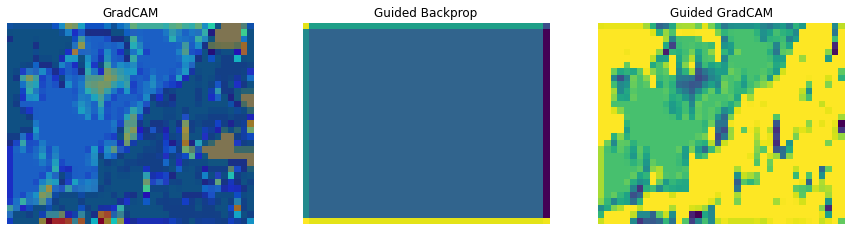

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 5
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.95395344 0.04604657]
predictions: [[0.04604657 0.95395344]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.954
	no_fire        	(0)	with probability 0.046
Explanation for 'fire'


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


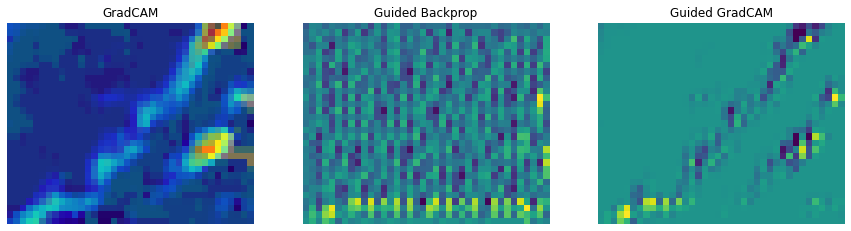

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 8
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.95395344 0.04604657]
predictions: [[0.04604657 0.95395344]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.954
	no_fire        	(0)	with probability 0.046
Explanation for 'fire'


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


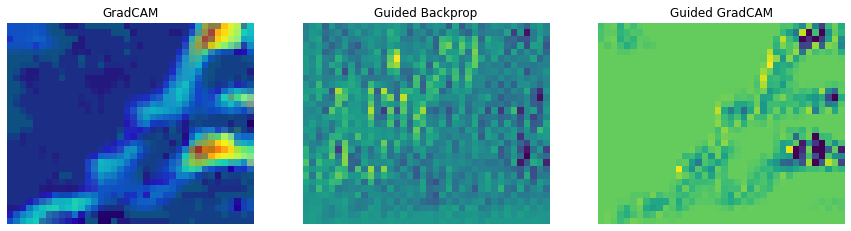

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 13
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.95395344 0.04604657]
predictions: [[0.04604657 0.95395344]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.954
	no_fire        	(0)	with probability 0.046
Explanation for 'fire'


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


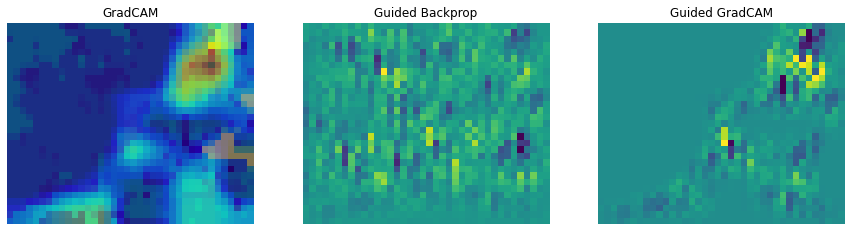

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 16
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.95395344 0.04604657]
predictions: [[0.04604657 0.95395344]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.954
	no_fire        	(0)	with probability 0.046
Explanation for 'fire'


100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


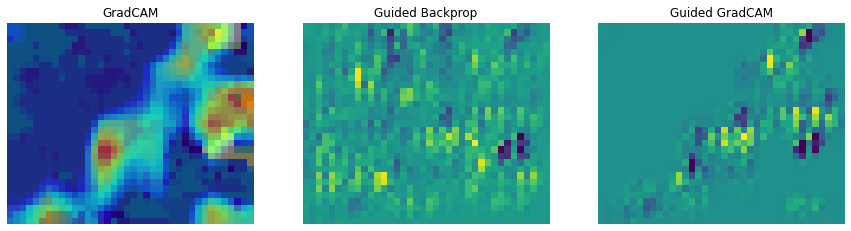

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 19
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.95395344 0.04604657]
predictions: [[0.04604657 0.95395344]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.954
	no_fire        	(0)	with probability 0.046
Explanation for 'fire'


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


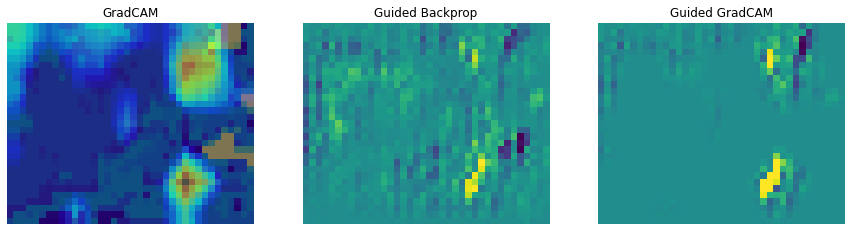

In [13]:
##### GradCam
imagePath = os.path.join('..', 'data', 'dataset', '1_1.png')
print("Layer 0")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath, 
                                                       layer_name='layer_0', 
                                                       cls=-1,
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True, 
                                                       save=False)

print("Layer 5")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_5',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

print("Layer 8")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_8',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

print("Layer 13")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_13',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

print("Layer 16")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_16',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

print("Layer 19")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_19',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 5
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.91495234 0.08504764]
predictions: [[0.91495234 0.08504764]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.915
	fire           	(1)	with probability 0.085
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.37s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


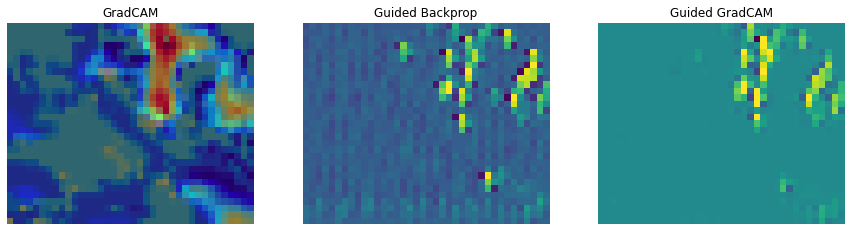

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 8
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.91495234 0.08504764]
predictions: [[0.91495234 0.08504764]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.915
	fire           	(1)	with probability 0.085
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


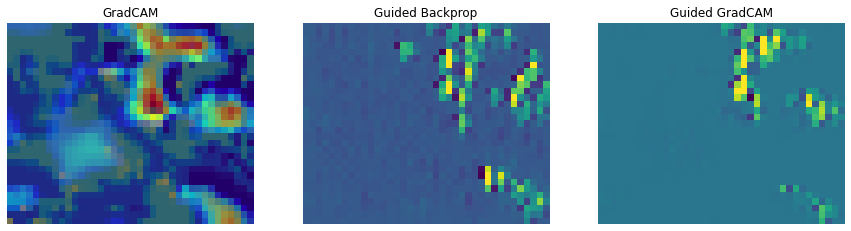

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 13
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.91495234 0.08504764]
predictions: [[0.91495234 0.08504764]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.915
	fire           	(1)	with probability 0.085
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


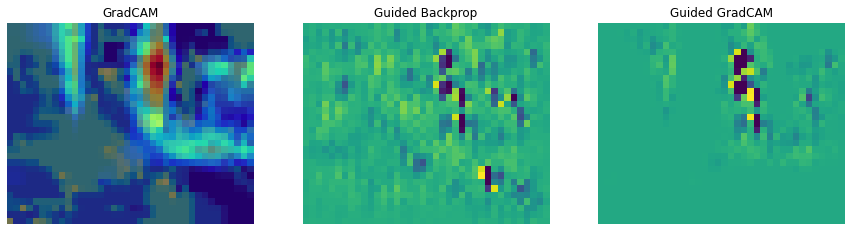

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 16
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.91495234 0.08504764]
predictions: [[0.91495234 0.08504764]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.915
	fire           	(1)	with probability 0.085
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


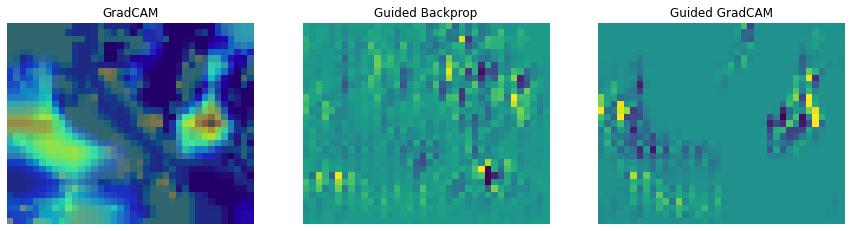

In [15]:
##### GradCam
imagePath = os.path.join('..', 'data', 'dataset', '0_2.png')
print("Layer 5")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath, 
                                                       layer_name='layer_5', 
                                                       cls=-1,
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True, 
                                                       save=False)

print("Layer 8")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_8',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

print("Layer 13")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_13',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

print("Layer 16")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_16',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 5
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [9.9970168e-01 2.9828958e-04]
predictions: [[9.9970168e-01 2.9828958e-04]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 1.000
	fire           	(1)	with probability 0.000
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


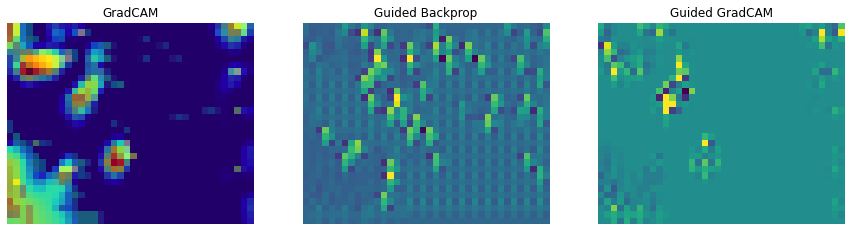

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 8
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [9.9970168e-01 2.9828958e-04]
predictions: [[9.9970168e-01 2.9828958e-04]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 1.000
	fire           	(1)	with probability 0.000
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


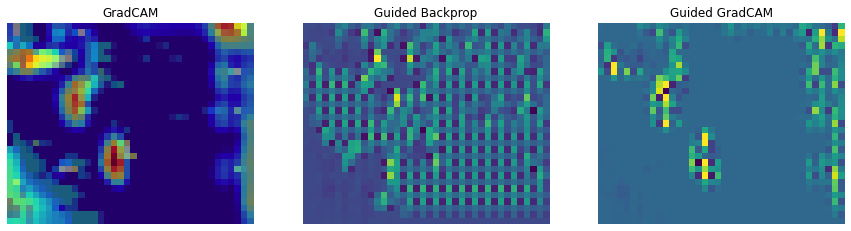

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 13
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [9.9970168e-01 2.9828958e-04]
predictions: [[9.9970168e-01 2.9828958e-04]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 1.000
	fire           	(1)	with probability 0.000
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


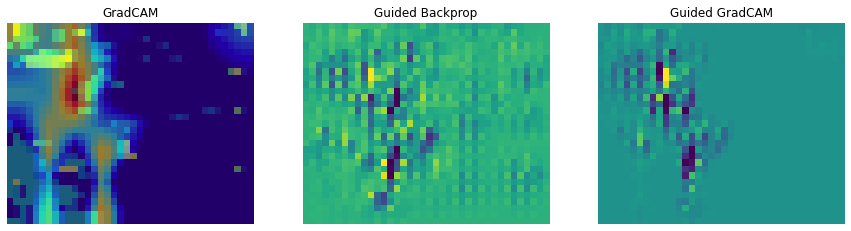

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 16
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [9.9970168e-01 2.9828958e-04]
predictions: [[9.9970168e-01 2.9828958e-04]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 1.000
	fire           	(1)	with probability 0.000
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


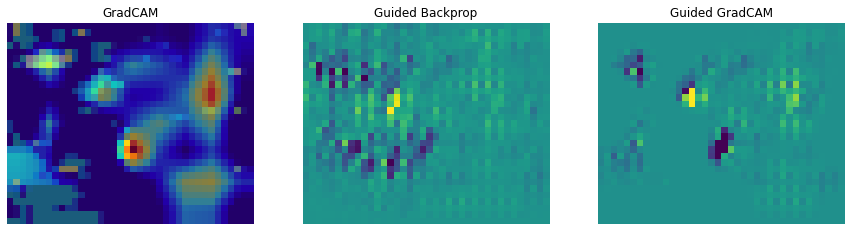

In [16]:
##### GradCam
imagePath = os.path.join('..', 'data', 'dataset', '0_84.png')
print("Layer 5")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath, 
                                                       layer_name='layer_5', 
                                                       cls=-1,
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True, 
                                                       save=False)

print("Layer 8")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_8',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

print("Layer 13")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_13',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

print("Layer 16")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_16',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 5
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.9965462  0.00345381]
predictions: [[0.00345381 0.9965462 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.997
	no_fire        	(0)	with probability 0.003
Explanation for 'fire'


100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


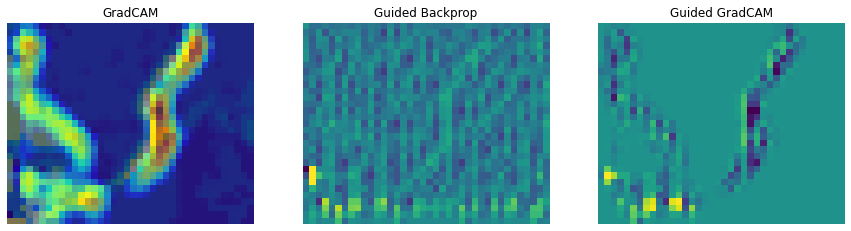

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 8
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.9965462  0.00345381]
predictions: [[0.00345381 0.9965462 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.997
	no_fire        	(0)	with probability 0.003
Explanation for 'fire'


100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


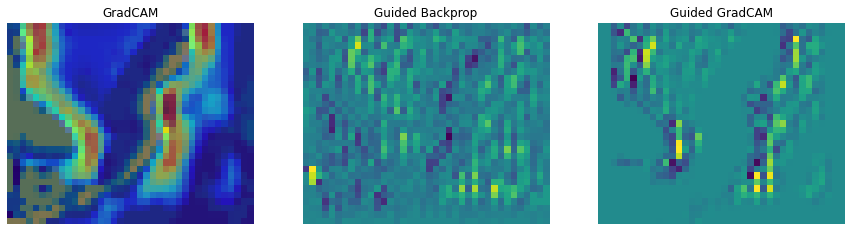

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 13
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.9965462  0.00345381]
predictions: [[0.00345381 0.9965462 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.997
	no_fire        	(0)	with probability 0.003
Explanation for 'fire'


100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


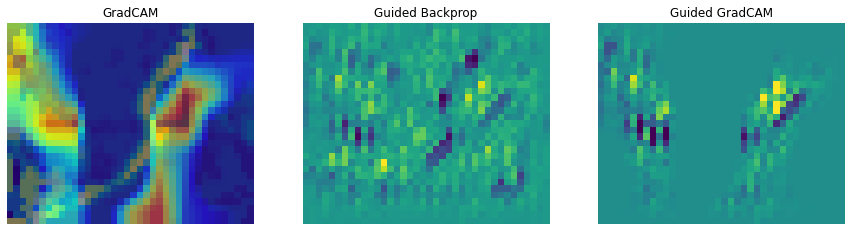

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 16
Shape image: (31, 38, 1)
Preprocessed inputs: (1, 31, 38, 1)
top: [0.9965462  0.00345381]
predictions: [[0.00345381 0.9965462 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.997
	no_fire        	(0)	with probability 0.003
Explanation for 'fire'


100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 1)
guided_backprop: (1, 31, 38, 1)


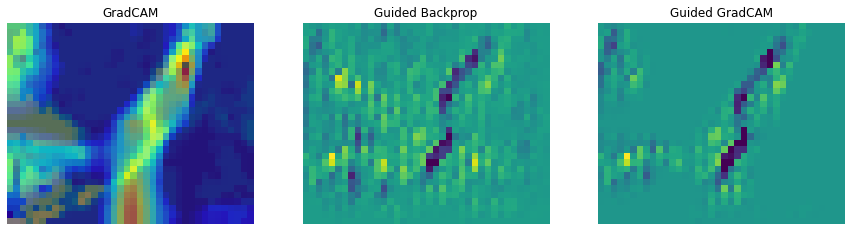

In [20]:
##### GradCam
imagePath = os.path.join('..', 'data', 'dataset', '1_11212.png')
print("Layer 5")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath, 
                                                       layer_name='layer_5', 
                                                       cls=-1,
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True, 
                                                       save=False)

print("Layer 8")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_8',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

print("Layer 13")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_13',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

print("Layer 16")
gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                       guided_model, 
                                                       imagePath,
                                                       layer_name='layer_16',
                                                       cls=-1, 
                                                       inputSize=(31,38),
                                                       channels=1,
                                                       visualize=True,
                                                       save=False)

## AttentionMaps on specific subset
Run visualization techniques on sample_set

In [21]:
##### GradCam VAL FIRE
def saliency_multiple():
    print(imagePath)
    print("Layer 5")
    gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                           guided_model, 
                                                           imagePath, 
                                                           layer_name='layer_5', 
                                                           cls=-1,
                                                           inputSize=(31,38),
                                                           channels=1,
                                                           visualize=True, 
                                                           save=False)

    print("Layer 8")
    gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                           guided_model, 
                                                           imagePath,
                                                           layer_name='layer_8',
                                                           cls=-1, 
                                                           inputSize=(31,38),
                                                           channels=1,
                                                           visualize=True,
                                                           save=False)

    print("Layer 13")
    gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                           guided_model, 
                                                           imagePath,
                                                           layer_name='layer_13',
                                                           cls=-1, 
                                                           inputSize=(31,38),
                                                           channels=1,
                                                           visualize=True,
                                                           save=False)

    print("Layer 16")
    gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                           guided_model, 
                                                           imagePath,
                                                           layer_name='layer_16',
                                                           cls=-1, 
                                                           inputSize=(31,38),
                                                           channels=1,
                                                           visualize=True,
                                                           save=False)

VAL_PATH_FIRE = os.path.join('..', 'data', 'sample_set', 'fire')
imagePaths = sorted(list(CPutils_tf2.paths.list_images(VAL_PATH_FIRE)))

for imagePath in imagePaths:
    saliency_multiple()

In [ ]:
##### GradCam VAL LR SPECIAL SET
def saliency_multiple():
    print(imagePath)
    print("Layer 5")
    gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                           guided_model, 
                                                           imagePath, 
                                                           layer_name='layer_5', 
                                                           cls=-1,
                                                           inputSize=(31,38),
                                                           channels=1,
                                                           visualize=True, 
                                                           save=False)

    print("Layer 8")
    gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                           guided_model, 
                                                           imagePath,
                                                           layer_name='layer_8',
                                                           cls=-1, 
                                                           inputSize=(31,38),
                                                           channels=1,
                                                           visualize=True,
                                                           save=False)

    print("Layer 13")
    gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                           guided_model, 
                                                           imagePath,
                                                           layer_name='layer_13',
                                                           cls=-1, 
                                                           inputSize=(31,38),
                                                           channels=1,
                                                           visualize=True,
                                                           save=False)

    print("Layer 16")
    gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                           guided_model, 
                                                           imagePath,
                                                           layer_name='layer_16',
                                                           cls=-1, 
                                                           inputSize=(31,38),
                                                           channels=1,
                                                           visualize=True,
                                                           save=False)

VAL_PATH_LR_SPECIAL = os.path.join('..', 'data', 'sample_set', 'LR')
imagePaths = sorted(list(CPutils_tf2.paths.list_images(VAL_PATH_LR_SPECIAL)))
for imagePath in imagePaths:
    saliency_multiple()

In [ ]:
##### GradCam VAL MR SPECIAL SET
VAL_PATH_MR_SPECIAL = os.path.join('..', 'data', 'sample_set', 'MR')
imagePaths = sorted(list(CPutils_tf2.paths.list_images(VAL_PATH_MR_SPECIAL)))
for imagePath in imagePaths:
    saliency_multiple()

In [ ]:
##### GradCam VAL HR SPECIAL SET
VAL_PATH_HR_SPECIAL = os.path.join('..', 'data', 'sample_set', 'HR')
imagePaths = sorted(list(CPutils_tf2.paths.list_images(VAL_PATH_HR_SPECIAL)))
for imagePath in imagePaths:
    saliency_multiple()

## GradCam batch & montage

In [46]:
# Load fire images
BASE_PATH = os.path.join('..', 'data', 'dataset', 'fire')
imagePaths = sorted(list(CPutils_tf2.paths.list_images(BASE_PATH)))

# Shuffle
seed = 42
random.seed(seed)
random.shuffle(imagePaths)

# Sample
sampleSize = 100
imagePaths = imagePaths[:sampleSize]

# Container
rawimages = []

# Loop
for imagePath in imagePaths:
    image = cv2.imread(imagePath, -1)
    image = cv2.resize(image, (38, 31))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    rawimages.append(np.expand_dims(image, -1))
    
# To array and process
rawimages = np.array(rawimages)
processedimages = rawimages/255.

print("Processedimages:", processedimages.shape)
print("Rawimages:", rawimages.shape)

Processedimages: (100, 31, 38, 1)
Rawimages: (100, 31, 38, 1)


100%|██████████| 4/4 [00:11<00:00,  2.99s/it]


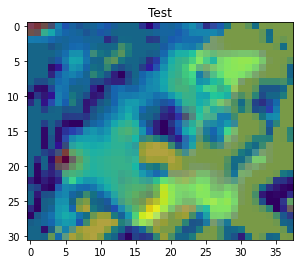

In [48]:
# GradCAM
layer = 'layer_5'
gcam = gradcam_utils_tf2.generate_gradCAM(batch_size=32, 
                                          layer=layer,
                                          model=model,
                                          processedimages=processedimages, 
                                          rawimages=rawimages,
                                          save=False,
                                          showID=1,
                                          title='Test', )

In [49]:
# Shapes
rawimages.shape, gcam.shape

((100, 31, 38, 1), (100, 31, 38))

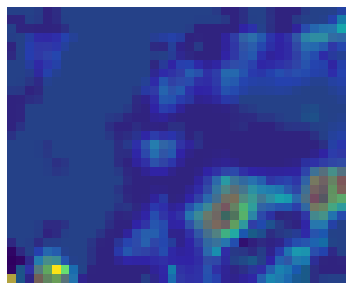

In [51]:
# Process a batch of rawimages
outGCAM = os.path.join('..', 'exp_outputs', 'GCAM_output')
if not os.path.exists(outGCAM):
    os.makedirs(outGCAM)

# Size
plt.rcParams['figure.figsize'] = 5,5
    
# Save processed pictures
for idx, image in enumerate(rawimages):
    fileName = os.path.join(outGCAM, str(idx) + '.png')
    im = plt.imshow(rawimages[idx])
    im2 = plt.imshow(gcam[idx], alpha=0.3, cmap='jet')
    plt.axis('off')
    plt.tight_layout()
    plt.axis("tight")  # gets rid of white border
    plt.axis("image")  # square up the image instead of filling the "figure" space
    plt.savefig(fileName, bbox_inches='tight', pad_inches=0.0)
    
# Read back the gcam processed
GCAM_imagesPaths = sorted(list(paths.list_images(outGCAM)))
GCAM_images = []
for imagepath in GCAM_imagesPaths:
    image = cv2.imread(imagepath)
    image = cv2.resize(image, (128,128))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    GCAM_images.append(image)    

In [52]:
# Process rawimages and gcam and save gcam ones (returns array of images)
def gcam_processed(rawimages, 
                   gcam,
                   outGCAM=os.path.join('GCAM_outputV2'),
                   show=False, 
                   size=(5,5), 
                   outsize=(128,128)):
    # Process a batch of rawimages
    if not os.path.exists(outGCAM):
        os.makedirs(outGCAM)

    # Size
    if show:
        plt.rcParams['figure.figsize'] = size

    # Save processed pictures
    for idx, image in enumerate(rawimages):
        fileName = os.path.join(outGCAM, str(idx) + '.png')
        im = plt.imshow(rawimages[idx])
        im2 = plt.imshow(gcam[idx], alpha=0.3, cmap='jet')
        plt.axis('off')
        plt.tight_layout()
        plt.axis("tight")  # gets rid of white border
        plt.axis("image")  # square up the image instead of filling the "figure" space
        plt.savefig(fileName, bbox_inches='tight', pad_inches=0.0)

    # Read back the gcam processed
    GCAM_imagesPaths = sorted(list(paths.list_images(outGCAM)))
    GCAM_images = []
    
    # Processe back
    for imagepath in GCAM_imagesPaths:
        image = cv2.imread(imagepath)
        image = cv2.resize(image, outsize)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        GCAM_images.append(image)    
        
    # Return
    return GCAM_images

In [53]:
# Get array  (example)
ima = im.get_array()
imb = im2.get_array()

<Figure size 360x360 with 0 Axes>

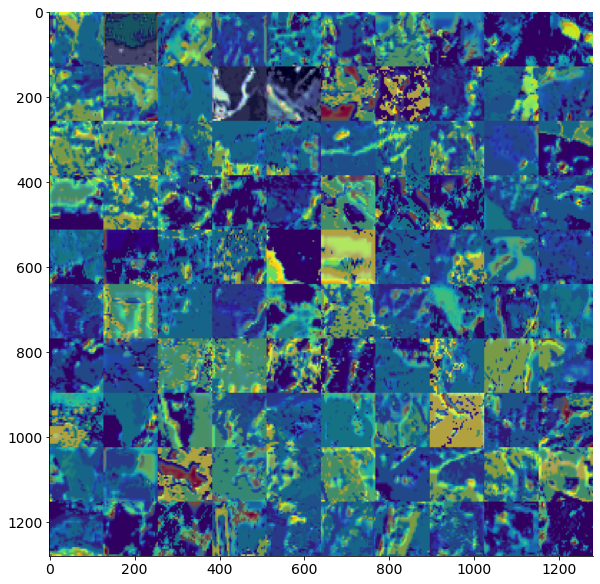

In [54]:
# GradCAM montage (100 random images from fire class)
CPutils_tf2.plt_style(figsize=(10,10))
_ = CPutils_tf2.build_montages(image_list=GCAM_images,
                               image_shape=(128,128),
                               montage_shape=(10,10))
plt.imshow(_[0])
OUT_COLLAGE = os.path.join('..', 'exp_outputs','collages', 'gradCAM')
if not os.path.exists(OUT_COLLAGE):
    os.makedirs(OUT_COLLAGE)
plt.imsave(os.path.join(OUT_COLLAGE, 'gradCAM_collage.png'), _[0])

/home/cris/envs/mobility/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/cris/envs/mobility/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tigh_layout" which is no longer supported as of 3.3 and will become an error two minor releases later


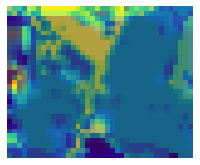

In [55]:
# Example of reading image on the fly from plot
from io import StringIO
from io import BytesIO
import PIL

# Generate plot
plt.rcParams['figure.figsize'] = 3,3
im = plt.imshow(rawimages[0], aspect='equal')
im2 = plt.imshow(gcam[0], alpha=0.3, cmap='jet', aspect='equal')
plt.axis('off')
plt.tight_layout()
plt.axis("tight")  # gets rid of white border
plt.axis("image")  # square up the image instead of filling the "figure" space

# Read plot on-the-fly
buffer_ = BytesIO()
plt.savefig(buffer_, format="png", pad=0, 
           tigh_layout=True, pad_inches=0, 
           bbox_inches='tight')
buffer_.seek(0)
image = PIL.Image.open(buffer_)
ar = np.asarray(image)
buffer_.close()

## Guided BackProp

In [57]:
# Process rawimages and gcam and save gcam ones (returns array of images)
def gprop_processed(gprop,
                    outGPROP=os.path.join('..', 'exp_outputs', 'GPROP_output'),
                    deprocess_object=None,
                    show=False, 
                    size=(5,5), 
                    outsize=(128,128)):
    # Process a batch of rawimages
    if not os.path.exists(outGPROP):
        os.makedirs(outGPROP)

    # Save processed pictures
    for idx, image in enumerate(rawimages):
        plt.imsave(os.path.join(outGPROP, str(idx) + '.png'), 
                   np.flip(deprocess_object(gprop[idx]), -1), 
                   cmap='jet', format='png')
        
    # Show
    if show:
        plt.rcParams['figure.figsize'] = size
        plt.imshow(np.flip(deprocess_object(gprop[idx]), -1), 
                   cmap='jet',)

    # Read back the gcam processed
    GPROP_imagesPaths = sorted(list(paths.list_images(outGPROP)))
    GPROP_images = []
    
    # Processe back
    for imagepath in GPROP_imagesPaths:
        image = cv2.imread(imagepath)
        image = cv2.resize(image, outsize)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        GPROP_images.append(image)    
        
    # Return
    return GPROP_images

<Figure size 288x288 with 0 Axes>

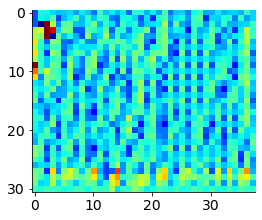

In [61]:
# Guided BackProp
CPutils_tf2.plt_style(figsize=(4,4))
gprop = gradcam_utils_tf2.generate_guidedbackprop(batch_size=32, 
                                                  deprocess_object=gradcam_utils_tf2.deprocess_image,
                                                  guided_model=guided_model,
                                                  layer=layer,
                                                  processedimages=processedimages,
                                                  save=False,
                                                  showID=0,
                                                  title='')

## Guided GradCam

In [62]:
# Process rawimages and gcam and save gcam ones (returns array of images)
def guidedGCAM_processed(gprop,
                         gradcam,
                         outGGCAM=os.path.join('..', 'exp_outputs','GGCAM_output'),
                         deprocess_object=None,
                         show=False, 
                         size=(5,5), 
                         alpha=0.5,
                         outsize=(128,128)):
    # Process a batch of rawimages
    if not os.path.exists(outGGCAM):
        os.makedirs(outGGCAM)
        
    # Guided gradCam
    guided_gradcam = gprop * gradcam[..., np.newaxis]

    # Save processed pictures
    for idx, image in enumerate(guided_gradcam):
        plt.imsave(os.path.join(outGGCAM, str(idx) + '.png'), 
                   np.flip(deprocess_object(guided_gradcam[idx]), -1), 
                   cmap='jet', format='png')
        
    # Show
    if show:
        plt.rcParams['figure.figsize'] = size
        plt.imshow(np.flip(deprocess_object(guided_gradcam[idx]), -1), 
                   cmap='jet', alpha=alpha)

    # Read back the gcam processed
    GGCAM_imagesPaths = sorted(list(paths.list_images(outGGCAM)))
    GGCAM_images = []
    
    # Processe back
    for imagepath in GGCAM_imagesPaths:
        image = cv2.imread(imagepath)
        image = cv2.resize(image, outsize)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        GGCAM_images.append(image)    
        
    # Return
    return GGCAM_images

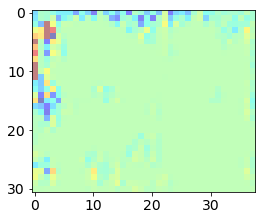

In [63]:
# Guided GradCAM BackProp
plt.rcParams['figure.figsize'] = 4,4
ggcam = gradcam_utils_tf2.generate_guidedgradCAM(deprocess_object=gradcam_utils_tf2.deprocess_image,
                                             gbp=gprop,
                                             gradcam=gcam,
                                             save=False,
                                             showID=0,
                                             title='')